In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import matplotlib.image as mpimg

from mpl_toolkits import mplot3d

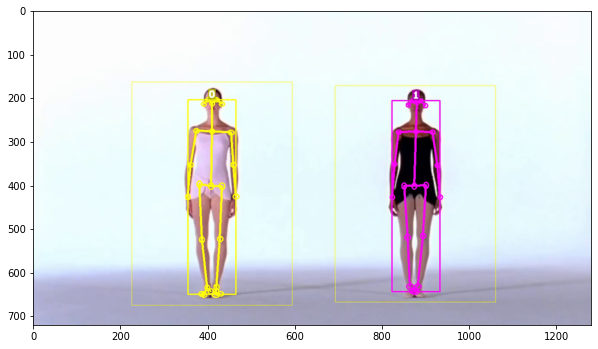

In [ ]:
plt.figure(figsize=(10,8))
img = mpimg.imread('/content/drive/MyDrive/Ballet-2/Ballet-002-01-out/0046.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
person_0 = np.load("/content/drive/MyDrive/Ballet-2/persons/person_0.npy")

In [ ]:
x_coordinates = []
y_coordinates = []
z_coordinates = []
labels = []
for i, coordinates in enumerate(person_0[0]):
    x_coordinates.append(coordinates[0])
    y_coordinates.append(coordinates[1])
    z_coordinates.append(coordinates[2])
    labels.append(i)

In [ ]:
fig = px.scatter_3d(x=x_coordinates, y=y_coordinates, z=z_coordinates, text=labels,range_x=[-1, 1],
                    range_y=[-1,1], range_z=[-1,1])
fig.show()

In [ ]:
def orthographic_projection(x, y, z):
    project_matrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1]])
    vec = np.array([x, y, z, 1])
    vec_projected = np.matmul(project_matrix, vec)
    return vec_projected

In [ ]:
def simple_perspective_projection(x, y, z, d):
    project_matrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1/d, 0]])
    vec = np.array([x, y, z, 1])
    vec_projected = np.matmul(project_matrix, vec)
    vec_projected = vec_projected/vec_projected[3]
    return vec_projected

In [ ]:
def camera_perspective_projection(x, y, z, c_x, c_y, c_z, n_x, n_y, n_z, v_x, v_y, v_z, d):
    #x, y, z - coordinates of point
    #c_x, c_y, c_z - coordinates of centre of the projection
    #n_x, n_y, n_z - image projection plane
    #v_x, v_y, v_z - another image projection plane

    n_plane = np.array([n_x, n_y, n_z])
    v_plane = np.array([v_x, v_y, v_z])
    u_plane = np.cross(n_plane, v_plane)
    
    vec = np.array([x, y, z, 1])
    camera_transform_mat = np.array([[u_plane[0], u_plane[1], u_plane[2], -c_x], [v_plane[0], v_plane[1], v_plane[2], -c_y], [n_plane[0], n_plane[1], n_plane[2], -c_z], [0, 0, 0, 1]])
    project_matrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1/d, 0]])
    
    new_vec = np.matmul(camera_transform_mat, vec)
    vec_projected = np.matmul(project_matrix, new_vec)
    vec_projected = vec_projected/vec_projected[3]
    return vec_projected

In [ ]:
x_projected = []
y_projected = []
for i in labels:
    projected = orthographic_projection(x_coordinates[i], y_coordinates[i], z_coordinates[i])
    x_projected.append(projected[0])
    y_projected.append(projected[1])

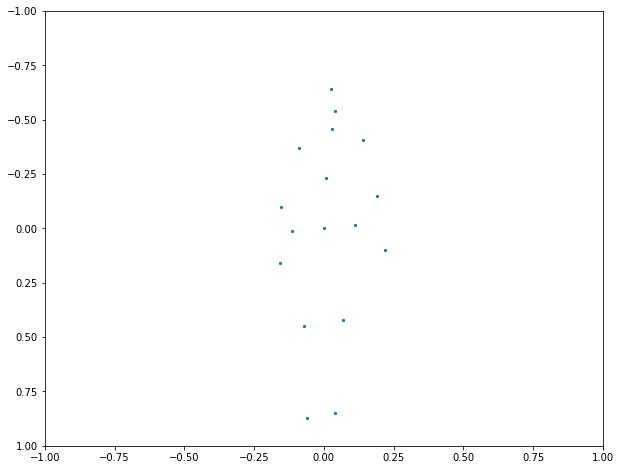

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_projected, y_projected, s=5)
plt.xlim([-1, 1])
plt.ylim([1, -1])
plt.show()

In [ ]:
#scale from (-1, 1) to sizes of box
x_interp = np.interp(x_projected, (-1, 1), (200, 600))
y_interp = np.interp(y_projected, (-1, 1), (100, 680))

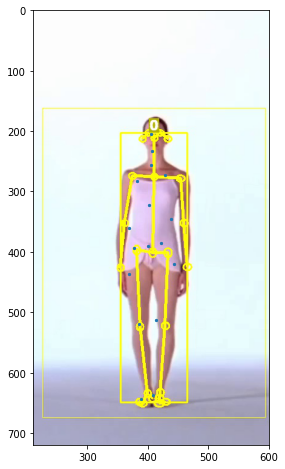

In [ ]:
plt.figure(figsize=(10,8))
img = mpimg.imread('/content/drive/MyDrive/Ballet-2/Ballet-002-01-out/0046.jpg')
imgplot = plt.imshow(img)
plt.scatter(x_interp, y_interp, s=5)
plt.xlim(210, 600)
plt.show()